Q1
Missing values before:
 track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64
Encoded columns head:
    explicit  explicit_encoded album_type  album_type_encoded
0      True                 1      album                   0
1      True                 1     single                   2
2      True                 1     single                   2
3      True                 1      album                   0
4      True                 1     single                   2
Scaled feature head:
    artist_followers  artist_followers_scaled
0           2812821                -0.558199
1           2363438                -0.570014
2        

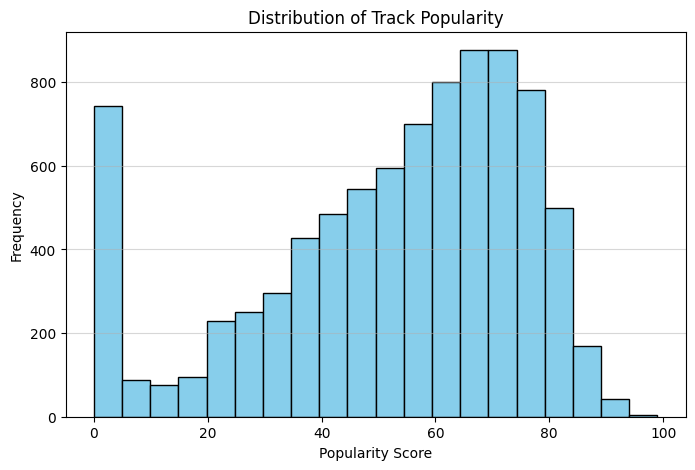


Q3
Correlation Matrix:
                     track_popularity  artist_popularity  artist_followers  \
track_popularity            1.000000           0.468081          0.232075   
artist_popularity           0.468081           1.000000          0.636242   
artist_followers            0.232075           0.636242          1.000000   
album_total_tracks         -0.053525           0.199407          0.183686   
track_duration_min          0.105712           0.208247          0.172164   

                    album_total_tracks  track_duration_min  
track_popularity             -0.053525            0.105712  
artist_popularity             0.199407            0.208247  
artist_followers              0.183686            0.172164  
album_total_tracks            1.000000            0.064794  
track_duration_min            0.064794            1.000000  


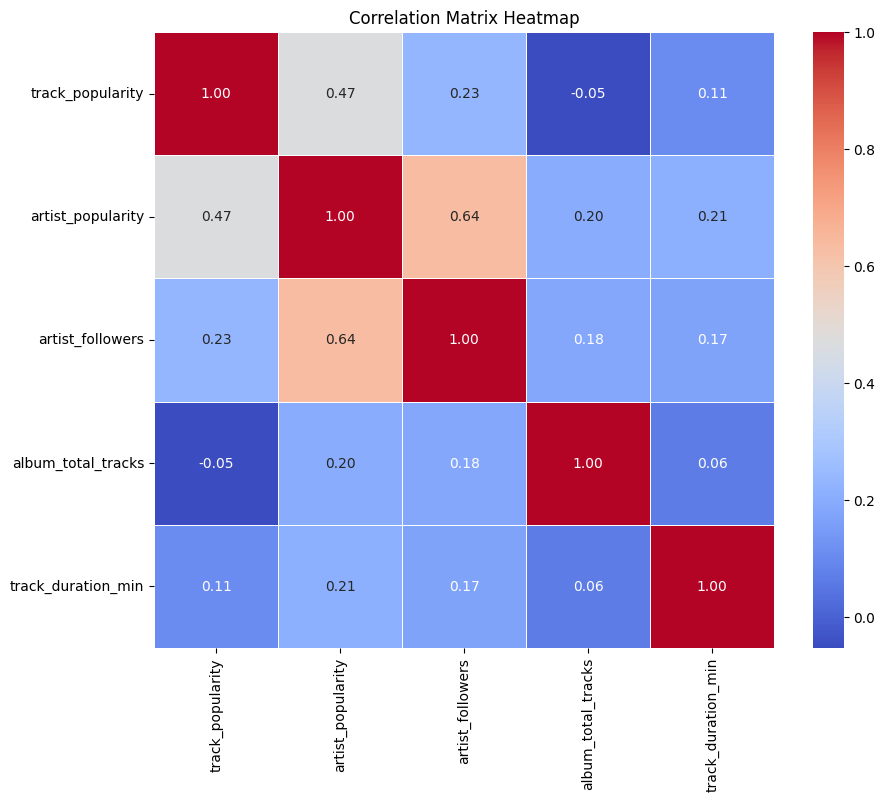

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('spotify.csv')

#Q1
print("Q1")

# 1. Handling Missing Values
print("Missing values before:\n", df.isnull().sum())

# Fill missing genres with 'Unknown'
df['artist_genres'] = df['artist_genres'].fillna('Unknown')
# Drop rows where artist_name is missing
df = df.dropna(subset=['artist_name'])

# 2. Encoding Categorical Values
le_explicit = LabelEncoder()
df['explicit_encoded'] = le_explicit.fit_transform(df['explicit'])

# 'album_type' is text, convert to numbers
le_album = LabelEncoder()
df['album_type_encoded'] = le_album.fit_transform(df['album_type'])

print("Encoded columns head:\n", df[['explicit', 'explicit_encoded', 'album_type', 'album_type_encoded']].head())

# 3. Feature Normalization
scaler = StandardScaler()
df['artist_followers_scaled'] = scaler.fit_transform(df[['artist_followers']])

print("Scaled feature head:\n", df[['artist_followers', 'artist_followers_scaled']].head())


#Q2
print("\nQ2")
plt.figure(figsize=(8, 5))
plt.hist(df['track_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.savefig('distribution_plot.png')
plt.show()


#Q3
print("\nQ3")

# Create a sub-table with only numeric columns
numeric_cols = ['track_popularity', 'artist_popularity', 'artist_followers', 
                'album_total_tracks', 'track_duration_min']
sub_table = df[numeric_cols]

# Calculate correlation using .corr()
corr_matrix = sub_table.corr()
print("Correlation Matrix:\n", corr_matrix)

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.savefig('heatmap.png')
plt.show()